# mini hw3 - ensembles

## Подготовка данных

Загрузите и предобработайте данные (по своему усмотрению) из hw1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

import warnings
warnings.simplefilter('ignore')

In [2]:
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = 11.7,8.27

In [3]:
train_df = pd.read_csv('data/train_features_with_answers.csv')
test_df = pd.read_csv('data/X_test.csv')
train_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,MS,M,NaN,U,LE3,T,1,3,at_home,services,...,yes,yes,4,3,3,2,3,3,0,9
1,GP,M,NaN,R,LE3,T,3,3,teacher,other,...,yes,no,3,3,4,3,5,3,16,12
2,GP,M,15.0,NaN,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,13
3,MS,M,17.0,R,GT3,T,4,3,services,other,...,yes,yes,4,5,5,1,3,2,4,11
4,GP,F,20.0,R,GT3,T,2,1,other,other,...,yes,yes,1,2,3,1,2,2,8,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,GP,M,15.0,U,GT3,T,4,2,other,other,...,yes,no,3,3,3,1,1,3,0,10
450,GP,F,15.0,U,GT3,T,2,2,other,other,...,yes,no,5,1,2,1,1,3,4,10
451,GP,M,16.0,U,GT3,T,4,4,services,services,...,yes,no,5,3,2,1,2,5,4,15
452,MS,F,15.0,R,LE3,T,1,1,at_home,services,...,yes,no,5,4,3,1,2,4,0,10


In [4]:
from sklearn.preprocessing import LabelEncoder


def cat_data(train_dropped):
    object_data = []
    binary_data = []
    for i in train_dropped:
        if (train_dropped[i].dtype == 'object') & (len(train_dropped[i].unique()) != 2):
            object_data.append(i)
        if (len(train_dropped[i].unique()) == 2):
            binary_data.append(i)
    return object_data,  binary_data


def encode_data(train_dropped, object_data,  binary_data):
    le = LabelEncoder()

    encoded_data = train_dropped.copy()
    encoded_data = pd.concat([encoded_data, pd.get_dummies(encoded_data[list(set(object_data) & set(train_dropped))])], axis=1)
    encoded_data.drop(list(set(object_data) & set(train_dropped)), inplace=True, axis=1)
    for i in list(set(binary_data) & set(train_dropped)) :
        encoded_data[i] = le.fit_transform(encoded_data[i])
    return encoded_data


def correlation(new_train, size=(16, 9)):
    fig, ax = plt.subplots(1, 1, figsize=size)
    fig.suptitle('Correlation of features of math and portuguese course', fontsize=15)

    sns.heatmap(new_train.corr(),
               vmin=-1, vmax=1, annot=True, cmap='RdBu')

    plt.show()

In [5]:
train_dropped = train_df.copy()
Y_train = train_dropped['G3']
train_dropped = train_dropped.drop(columns=['Fedu', 'Medu', 'Walc', 'Dalc', 'goout', 'G3', 'address', 'school', 'guardian', 'reason'])

In [6]:
from random import choice

# Значения, которые не равны F или M заменяются случайно на F или M
indexes = train_dropped[~train_dropped['sex'].isin(['F', 'M'])].index
for ind in indexes:
    train_dropped.loc[ind, 'sex'] = choice(['F', 'M'])

In [7]:
# Отсутствующий и абсурдный возрат исправляем на значение среднего возраста из датасета
indexes = train_dropped[(train_dropped['age'].isnull() == True) | (train_dropped['age'] < 15) | (train_dropped['age'] > 22)].index
rounded_mean = round(train_dropped['age'].mean())
for ind in indexes:
    train_dropped.loc[ind ,'age'] = rounded_mean

In [8]:
object_data,  binary_data = cat_data(train_dropped)
encoded_data = encode_data(train_dropped, object_data,  binary_data)
encoded_data

,sex,age,famsize,Pstatus,traveltime,studytime,failures,schoolsup,famsup,paid,...,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
0,1,18.0,1,1,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,1,18.0,1,1,3,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,1,15.0,0,1,1,2,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,1,17.0,0,1,2,2,1,0,1,1,...,0,0,1,0,0,0,0,0,1,0
4,0,20.0,0,1,2,2,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,1,15.0,0,1,1,4,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
450,0,15.0,0,1,1,4,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
451,1,16.0,0,1,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
452,0,15.0,1,1,2,2,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [9]:
print(encoded_data.isnull().sum(), end='\n\n')
for column in encoded_data.columns:
    print(f'{column} - {encoded_data[column].unique()} - {len(encoded_data[column].unique())}')

sex              0
age              0
famsize          0
Pstatus          0
traveltime       0
studytime        0
failures         0
schoolsup        0
famsup           0
paid             0
activities       0
nursery          0
higher           0
internet         0
romantic         0
famrel           0
freetime         0
health           0
absences         0
Fjob_at_home     0
Fjob_health      0
Fjob_other       0
Fjob_services    0
Fjob_teacher     0
Mjob_at_home     0
Mjob_health      0
Mjob_other       0
Mjob_services    0
Mjob_teacher     0
dtype: int64

sex - [1 0] - 2
age - [18. 15. 17. 20. 16. 19. 21. 22.] - 8
famsize - [1 0] - 2
Pstatus - [1 0] - 2
traveltime - [1 3 2 4] - 4
studytime - [1 2 3 4] - 4
failures - [0 1 2 3] - 4
schoolsup - [0 1] - 2
famsup - [0 1] - 2
paid - [0 1] - 2
activities - [0 1] - 2
nursery - [1 0] - 2
higher - [0 1] - 2
internet - [1 0] - 2
romantic - [1 0] - 2
famrel - [4 3 5 1 2] - 5
freetime - [3 5 2 1 4] - 5
health - [3 5 2 1 4] - 5
absences - [ 0 16 

In [10]:
encoded_data = encoded_data.drop(columns=['Fjob_services', 'Mjob_other', 'Fjob_at_home', 'Mjob_at_home'])

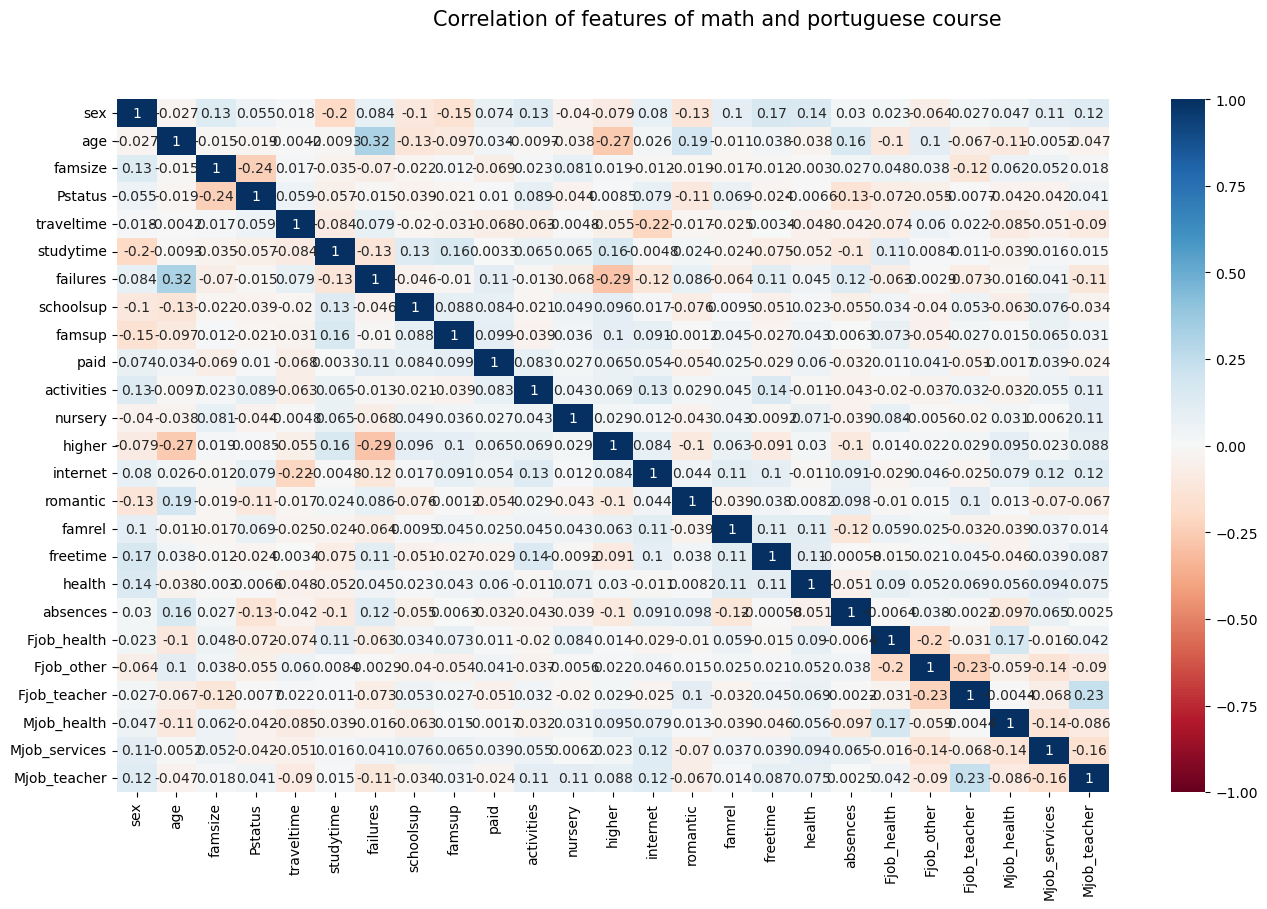

In [11]:
X_train = encoded_data.copy()
correlation(encoded_data)

oob_score = 0.18116287598325875


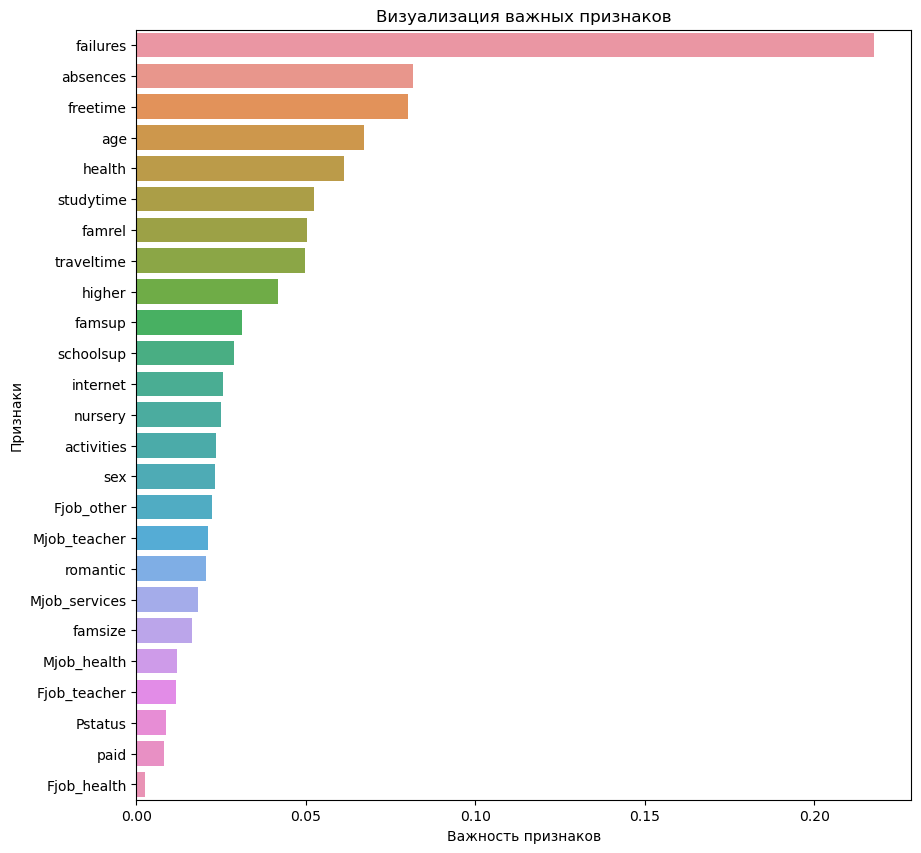

In [12]:
#  оценим важнсть признаков
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(oob_score=True)
rf.fit(X_train, Y_train)
print("oob_score =", rf.oob_score_)

feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False) 

plt.figure(figsize=(10,10))

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Визуализация важных признаков')
plt.show()

In [13]:
X_train = X_train.drop(columns=['Fjob_health', 'Pstatus', 'paid'])

In [14]:
X_test = test_df.copy()
X_test = X_test.drop(columns=['Fedu', 'Medu', 'Walc', 'Dalc', 'goout', 'address', 'school', 'reason', 'guardian'])

In [15]:
# Предобработка тестовых данных
object_data,  binary_data = cat_data(X_test)
X_test = encode_data(X_test, object_data,  binary_data)
X_test = X_test.drop(columns=['Fjob_services', 'Mjob_other', 'Fjob_at_home', 'Mjob_at_home'])
X_test = X_test.drop(columns=['Fjob_health', 'Pstatus', 'paid'])

In [16]:
print(X_test.isnull().sum(), end='\n\n')
for column in X_test.columns:
    print(f'{column} - {X_test[column].unique()} - {len(X_test[column].unique())}')

sex              0
age              0
famsize          0
traveltime       0
studytime        0
failures         0
schoolsup        0
famsup           0
activities       0
nursery          0
higher           0
internet         0
romantic         0
famrel           0
freetime         0
health           0
absences         0
Fjob_other       0
Fjob_teacher     0
Mjob_health      0
Mjob_services    0
Mjob_teacher     0
dtype: int64

sex - [1 0] - 2
age - [18 16 15 17 19] - 5
famsize - [0 1] - 2
traveltime - [1 2 3 4] - 4
studytime - [2 3 4 1] - 4
failures - [0 3 1 2] - 4
schoolsup - [0 1] - 2
famsup - [0 1] - 2
activities - [1 0] - 2
nursery - [0 1] - 2
higher - [1 0] - 2
internet - [1 0] - 2
romantic - [0 1] - 2
famrel - [3 2 4 5 1] - 5
freetime - [2 3 4 1 5] - 5
health - [2 4 1 5 3] - 5
absences - [ 4  2  0  5  6 10  8  9 14 16 15  1 11 30 12  3  7 22 26] - 19
Fjob_other - [0 1] - 2
Fjob_teacher - [1 0] - 2
Mjob_health - [0 1] - 2
Mjob_services - [0 1] - 2
Mjob_teacher - [1 0] - 2


## Обоснуйте выбор слабых (базовых) алгоритмов

knn - классический вариант. Результаты людей с похожими признаками похожи

linear_regression - Работает хорошо с любым размером данных + хорошо идет в паре с кросс-валидацией

svm - параметр C хорошо помогает справляться с выбросами

naive_bayes - быстрый, хорошо работает даже с малым объемом данных

decision_tree - в модели много категориальных признаков, с которыми деревья справляются лучше всего

### Подбираем лучшие параметры

In [17]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV

regressors_names = ['KNeighborsRegressor', 'LinearRegression', 'DecisionTreeRegressor', 'SVR']
regressors = [KNeighborsRegressor(), LinearRegression(), DecisionTreeRegressor(), SVR()]
classifiers_names = ['KNeighborsClassifier', 'GaussianNB', 'DecisionTreeClassifier', 'SVC']
classifiers = [KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(), SVC()]



grid_p = {}
grid_p['KNeighborsRegressor'] = {'n_neighbors':[i for i in range(30, 120)], 
                                  'weights':['uniform', 'distance'],
                                  'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_p['LinearRegression'] = {'normalize':[True, False]}
grid_p['DecisionTreeRegressor'] = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                                   'max_depth': [i for i in range(1, 5)],
                                   'min_samples_split': [i for i in range(2, 10)]}
grid_p['SVR'] = {'kernel':['linear', 'poly', 'sigmoid'],
                 'C':np.linspace(0.1, 2.5, 40)}

grid_p['KNeighborsClassifier'] = {'n_neighbors':[i for i in range(30, 120)], 
                                  'weights':['uniform', 'distance'],
                                  'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_p['GaussianNB'] = {'var_smoothing': np.linspace(0.01, 1, 20)}
grid_p['DecisionTreeClassifier'] = {'criterion':['gini', 'entropy', 'log_loss'],
                                    'max_depth': [i for i in range(1, 5)],
                                   'min_samples_split': [i for i in range(2, 10)]}
grid_p['SVC'] = {'kernel': ['linear', 'poly', 'sigmoid'],
                 'C':np.linspace(0.1, 2.5, 40)}

In [18]:
models_regressors = {}
for i, name in enumerate(regressors_names):
    m = GridSearchCV(regressors[i], param_grid=grid_p[name], cv=20, scoring='neg_mean_squared_error', n_jobs=np.array(-1))
    m.fit(X_train, Y_train)
    models_regressors[name] = m

In [19]:
models_classifiers = {}
for i, name in enumerate(classifiers_names):
    m = GridSearchCV(classifiers[i], param_grid=grid_p[name], cv=20, scoring='neg_mean_squared_error', n_jobs=np.array(-1))
    m.fit(X_train,Y_train)
    models_classifiers[name] = m

In [20]:
for model in models_regressors:
    print(f'{model}: {models_regressors[model].best_params_}, best_score = {models_regressors[model].best_score_}', end='\n\n')

KNeighborsRegressor: {'algorithm': 'kd_tree', 'n_neighbors': 31, 'weights': 'distance'}, best_score = -9.104864760678288

LinearRegression: {'normalize': True}, best_score = -7.8437395959829885

DecisionTreeRegressor: {'criterion': 'squared_error', 'max_depth': 1, 'min_samples_split': 2}, best_score = -8.075930358445117

SVR: {'C': 0.34615384615384615, 'kernel': 'linear'}, best_score = -7.776890609298524



In [21]:
for model in models_classifiers:
    print(f'{model}: {models_classifiers[model].best_params_}, best_score = {models_classifiers[model].best_score_}', end='\n\n')

KNeighborsClassifier: {'algorithm': 'auto', 'n_neighbors': 87, 'weights': 'distance'}, best_score = -8.975691699604742

GaussianNB: {'var_smoothing': 0.4268421052631579}, best_score = -9.998715415019765

DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 7}, best_score = -8.657608695652174

SVC: {'C': 1.2692307692307692, 'kernel': 'poly'}, best_score = -8.849011857707513



In [22]:
algorithms = [SVR(C=0.5308, kernel='linear'),
              LinearRegression(normalize=True),
              DecisionTreeRegressor(criterion='absolute_error', max_depth=3, min_samples_split=7),
              DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=4)
             ]

## Постройте решение на основе подхода Blending

Правила:
- Нужно использовать вероятности
- Предложите что-то лучше, чем брать среднее от предсказаний моделей (оценивать уверенность алгоритмов, точности и т.д.)
- Заставьте базовые алгоритмы быть некорелированными
- Добавьте рандома (например, стройте ваши алгоритмы на разных выборках, по разному предобрабатывайте данные или применяйте для разных признаков соответствующие алгоритмы ... )
- Проявите смекалку

### Разобьем обучающую выборку

In [23]:
from sklearn.model_selection import train_test_split

A_x, B_x, A_y, B_y = train_test_split(X_train, Y_train, test_size=0.1)

In [24]:
for algorithm in algorithms:
    algorithm.fit(A_x, A_y)

In [25]:
A_x.shape, B_x.shape

((408, 22), (46, 22))

In [26]:
predictions = np.array([algorithm.predict(B_x) for algorithm in algorithms]).T
predictions_test = np.array([algorithm.predict(X_test) for algorithm in algorithms]).T

In [27]:
predictions.shape, predictions_test.shape

((46, 4), (195, 4))

In [28]:
predictions

array([[ 7.23300857,  5.60799488,  9.        ,  9.        ],
       [12.22886275, 12.47262953, 13.        , 13.        ],
       [10.8303733 , 10.07226345, 13.        , 11.        ],
       [10.56111472, 10.17974627,  9.        ,  8.        ],
       [13.01651511, 12.82364289, 11.        , 11.        ],
       [10.76715851, 10.60075909, 13.        , 13.        ],
       [ 9.79018736,  8.94145206, 10.        , 10.        ],
       [12.09105455, 12.42794232, 11.        , 11.        ],
       [13.11165988, 13.4319663 , 13.        , 13.        ],
       [11.53024345, 10.83484069, 10.        , 11.        ],
       [11.04355487,  9.79992365,  9.        , 10.        ],
       [13.38035229, 12.47056492, 11.        , 11.        ],
       [13.05657698, 13.08467577, 13.        , 13.        ],
       [11.15305067, 10.71178795, 13.        , 11.        ],
       [12.40556605, 13.10876854, 11.        , 11.        ],
       [13.32956749, 13.54603447, 11.        , 11.        ],
       [ 9.08622487,  8.

In [29]:
ROUND = np.vectorize(round)

### Дадим алгоритмам одинаковые веса

In [30]:
weights = np.array([0.25, 0.25, 0.25, 0.25])
pred = predictions @ weights

error = pred - B_y
mse = np.mean(error**2)
mse

7.01667657198243

In [31]:
test_pred = ROUND(predictions_test @ weights)
pd.Series(test_pred, name='G3').to_csv('type_1_same_weights_of_4_algos.csv', index_label='id')
test_pred

array([13, 13, 13, 13, 11, 13, 14,  8, 13, 12, 13, 12, 13, 12, 12, 15, 13,
       11, 13, 13, 12, 12, 14, 12, 13, 12,  9, 14, 13, 12, 13, 13,  9,  8,
       11, 13, 12, 13, 12, 10, 13, 14, 14, 14, 13, 12, 13, 13, 13, 12, 11,
       13, 11, 10, 14, 14, 11, 12,  9, 10,  7, 13, 13, 14, 12, 13, 10,  8,
        8, 11, 13, 13, 12, 12, 13, 11, 13, 13, 13, 11,  9, 13, 13, 11, 13,
       12, 13, 12, 13, 13, 14,  9, 11, 14, 10, 13, 13, 12, 13, 11, 11, 13,
       12, 10, 11, 11, 12, 13, 10, 11, 14, 13, 13, 12, 10, 12, 11, 14, 10,
       11, 14, 13, 12, 12, 12, 12, 13, 11, 14, 13, 13, 13, 13, 12, 10, 10,
        8, 10, 12, 12, 13, 11, 13, 12, 13, 14, 13, 13, 13, 11, 14, 14, 12,
       13, 12, 13, 13, 14, 12, 12,  9, 14, 12, 13, 11, 13, 12, 12, 10, 13,
       13, 13, 12, 13,  9, 13, 13, 13,  9, 13, 14, 13, 13, 13, 13, 13, 13,
        9, 12, 13, 12,  8, 10, 11, 13])

### Распределить веса алгоритмам в соответствии с правильностью предсказания на обучающей выборке

In [32]:
from numpy.random import normal as nl

weights = np.ones((len(algorithms)))
for i, alg in enumerate(algorithms):
    error = alg.predict(A_x) - A_y
    mse = np.mean(error**2)
    print(mse)
    weights[i] = 1 / (mse + nl(0, 0.015)) # + random noise
weights = weights / weights.sum()
weights

7.410518623887917
7.141974950083903
7.340686274509804
7.605392156862745


array([0.24805027, 0.25849316, 0.25163045, 0.24182611])

In [33]:
pred = predictions @ weights

error = pred - B_y
mse = np.mean(error**2)
mse

7.010650828506114

In [34]:
test_pred = ROUND(predictions_test @ weights)
pd.Series(test_pred, name='G3').to_csv('type_1_div_weights_of_4_algos.csv', index_label='id')
test_pred

array([13, 13, 13, 13, 11, 13, 14,  8, 13, 12, 13, 12, 13, 12, 12, 15, 13,
       11, 13, 13, 12, 12, 14, 12, 13, 12,  9, 14, 13, 12, 13, 13,  9,  8,
       11, 13, 12, 13, 12, 10, 13, 14, 14, 14, 13, 12, 13, 13, 13, 12, 11,
       13, 12, 10, 14, 14, 11, 12,  9, 10,  7, 13, 13, 14, 12, 13, 10,  8,
        8, 11, 13, 13, 12, 12, 13, 11, 13, 13, 13, 11,  9, 13, 13, 11, 13,
       12, 13, 12, 13, 13, 14,  9, 11, 14, 10, 13, 13, 12, 13, 11, 12, 13,
       12, 10, 11, 11, 12, 13, 10, 11, 14, 13, 13, 12, 10, 12, 11, 14, 10,
       11, 14, 13, 12, 12, 12, 12, 13, 11, 14, 13, 13, 13, 13, 12, 10, 10,
        8, 10, 12, 12, 13, 11, 13, 12, 13, 14, 13, 13, 13, 11, 14, 14, 12,
       13, 12, 13, 13, 14, 12, 12,  9, 14, 12, 13, 11, 13, 12, 12, 10, 13,
       13, 13, 12, 13,  9, 13, 13, 13,  9, 13, 14, 13, 13, 13, 13, 13, 13,
        9, 12, 13, 12,  8, 10, 11, 13])

### Попробуем обучать алгоритмы на разных выборках

In [35]:
# Обучаемся на 400 рандомных значениях
B_x = X_train.sample(n=400)
B_x.index
B_y = Y_train[B_x.index]

B_fp_y = Y_train[~Y_train.index.isin(B_x.index)]
B_fp = X_train[~Y_train.index.isin(B_x.index)]
B_x.shape, B_y.shape

((400, 22), (400,))

In [36]:
B_fp.shape, B_fp_y.shape

((54, 22), (54,))

In [37]:
n_A_x, n_A_y = [], []
for i in range(len(algorithms)):
    A_x, _, A_y, _ = train_test_split(B_x, B_y, train_size=0.8)
    n_A_x.append(A_x)
    n_A_y.append(A_y)
    print(n_A_x[i].shape, n_A_y[i].shape) 

(320, 22) (320,)
(320, 22) (320,)
(320, 22) (320,)
(320, 22) (320,)


In [38]:
for i, alg in enumerate(algorithms):
    alg.fit(n_A_x[i], n_A_y[i])

In [39]:
predictions = np.array([alg.predict(B_fp) for alg in algorithms]).T
predictions_test = np.array([alg.predict(X_test) for alg in algorithms]).T

predictions.shape, predictions_test.shape

((54, 4), (195, 4))

### На одинаковых весах

In [40]:
weights = np.array([0.25, 0.25, 0.25, 0.25])
pred = predictions @ weights

error = pred - B_fp_y
mse = np.mean(error**2)
mse

7.652394622697212

In [41]:
test_pred = ROUND(predictions_test @ weights)
pd.Series(test_pred, name='G3').to_csv('type_2_same_weights_of_4_algos.csv', index_label='id')
test_pred

array([14, 13, 14, 13, 11, 13, 13,  8, 13, 12, 14, 13, 13, 11, 11, 14, 13,
       11, 14, 13, 13, 11, 14, 14, 13, 13,  9, 14, 13, 12, 13, 13,  9,  7,
       11, 13, 14, 13, 14, 11, 13, 14, 13, 14, 13, 11, 13, 13, 13, 12, 11,
       13, 12, 10, 13, 14, 13, 11,  9,  9,  4, 13, 14, 14, 14, 13, 10,  9,
        9, 12, 13, 13, 12, 12, 13, 11, 13, 13, 13, 12,  9, 13, 13, 12, 12,
       12, 13, 12, 13, 13, 14,  9, 12, 14, 11, 13, 13, 14, 13, 12, 12, 13,
       11, 10, 12, 10, 13, 13,  9, 11, 14, 14, 13, 12,  9, 12, 12, 14, 10,
        8, 14, 13, 12, 13, 11, 13, 13, 12, 14, 13, 13, 13, 13, 13, 10, 10,
        8, 10, 12, 13, 13, 13, 13, 12, 13, 14, 14, 13, 13, 13, 14, 13, 12,
       13, 11, 13, 13, 14, 12, 11, 10, 14, 13, 14, 11, 13, 13, 12, 10, 13,
       13, 13, 13, 13, 10, 13, 13, 13,  7, 13, 14, 13, 13, 13, 13, 13, 13,
       10, 12, 12, 11,  8, 10, 11, 13])

### В соответствии с правильностью предсказания на обучающей выборке

In [42]:
weights = np.ones((len(algorithms)))
for i, alg in enumerate(algorithms):
    error = alg.predict(B_fp) - B_fp_y
    mse = np.mean(error**2)
    print(mse)
    weights[i] = 1 / (mse + nl(0, 0.015)) # + random noise
weights = weights / weights.sum()
weights

7.601552088335892
7.522560539422732
8.166666666666666
11.444444444444445


array([0.27687463, 0.28070224, 0.25807829, 0.18434484])

In [43]:
pred = predictions @ weights

error = pred - B_fp_y
mse = np.mean(error**2)
mse

7.52871012891975

In [44]:
test_pred = ROUND(predictions_test @ weights)
pd.Series(test_pred, name='G3').to_csv('type_2_div_weights_of_4_algos.csv', index_label='id')
test_pred

array([14, 13, 14, 13, 11, 14, 13,  8, 13, 12, 14, 13, 13, 11, 11, 14, 13,
       11, 14, 13, 13, 11, 14, 14, 13, 13,  9, 14, 13, 12, 13, 13,  9,  7,
       11, 13, 14, 13, 13, 11, 13, 14, 13, 14, 13, 12, 13, 13, 13, 12, 11,
       13, 12, 10, 13, 14, 12, 11,  9, 10,  5, 13, 14, 14, 14, 13, 10,  9,
        8, 12, 13, 13, 12, 12, 13, 11, 13, 13, 13, 12,  9, 13, 13, 12, 12,
       12, 13, 13, 13, 13, 14,  9, 12, 14, 11, 13, 13, 13, 13, 12, 12, 13,
       11, 10, 12, 10, 13, 13,  9, 11, 14, 14, 13, 12, 10, 12, 12, 14, 10,
        9, 14, 13, 12, 13, 11, 13, 13, 12, 14, 12, 13, 13, 13, 13, 10, 10,
        8, 10, 12, 13, 13, 13, 13, 12, 12, 14, 14, 13, 13, 13, 14, 13, 12,
       13, 11, 13, 13, 14, 12, 12, 10, 14, 12, 14, 11, 13, 13, 12, 10, 13,
       13, 12, 13, 13, 10, 13, 13, 12,  7, 13, 14, 13, 13, 13, 13, 13, 13,
        9, 12, 12, 11,  8, 10, 11, 13])

## Постройте решение на основе подхода Stacking

Правила:
- Реализуйте пайплайн обучения и предсказания (например, sklearn.pipeline или класс)
- Проведите оптимизацию пайплайна
- Оцените вклад каждого базового алгоритма в итоговое предсказание

In [45]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse

class Cross():
    """
    Класс для осуществления кросс-валидации каждого базового алгоритма
    """
    def __init__(self, n_folds, alg):
        self.n_folds = n_folds
        self.alg = alg
    
    def cross_val(self, X_train, Y_train):
        """Кросс-валидация"""
        self.y_pred = []
        self.scores = []
        self.folds = []
        self.kf = KFold(n_splits=self.n_folds)
        for train_index, test_index in self.kf.split(X_train):
            x_train, x_test = X_train.iloc[train_index], X_train.iloc[test_index]
            y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]
            self.alg.fit(x_train, y_train)
            self.y_pred.append(self.alg.predict(x_test))
            self.folds.append(x_test)
            self.scores.append(mse(y_test, self.alg.predict(x_test)))
        self.y_pred = np.concatenate(self.y_pred)

In [46]:
from sklearn.base import BaseEstimator

In [47]:
class Stacked_gen(BaseEstimator):
    """
    Класс для Stacking модели
    """
    def __init__(self, base_algos=None, stack_algo=None, n_folds=None):
        self.base_algos = base_algos
        self.stack_algo = stack_algo
        self.n_folds = n_folds
        
        
    def base_pred(self, X_train, Y_train):
        """Кросс-валидация каждого базового алгоритма"""
        base_pred = []
        self.scores = []
        for i, alg in enumerate(self.base_algos):
            cpv = Cross(n_folds=self.n_folds, alg=alg)
            cpv.cross_val(X_train, Y_train)
            self.scores.append(cpv.scores.copy())
            base_pred.append(cpv.y_pred)
        base_pred = np.array(base_pred)
        return base_pred.T, cpv, self.scores
    
    
    def train_base_algos(self, X_train, y_train):
        """
        Обучение базовых моделей на всей обучающей выборке. Это нужно, потому что именно эти модели 
        будут использоваться в функции self.predict
        """
        for alg in self.base_algos:
            alg.fit(X_train, Y_train)

            
    def fit(self, X_train, Y_train):
        """
        Обучаем модель на всей выборке Y_train по результатам предсказаний каждой из моделей
        """
        base_predictions, cpv, scores = self.base_pred(X_train, Y_train)
        self.train_base_algos(X_train, Y_train)
        self.stack_algo.fit(base_predictions, Y_train)
    
    
    def predict(self, X_test):
        """
        Предсказание обученной стэкинговой модели
        """
        predictions_test_data = np.zeros((X_test.shape[0], len(self.base_algos)))
        for i, alg in enumerate(self.base_algos):
            predictions_test_data[:,i] = alg.predict(X_test)
        
        test_pred = self.stack_algo.predict(predictions_test_data) 
        return test_pred

In [48]:
base_algos = [SVR(C=0.5308, kernel='linear'),
              LinearRegression(normalize=True),
              DecisionTreeRegressor(criterion='absolute_error', max_depth=3, min_samples_split=7),
              DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=4)
             ]
base_algos_names = ['SVR', 'LinearRegression', 'DecisionTreeRegressor', 'DecisionTreeClassifier']

stack_algo = LinearRegression(normalize=True)

In [49]:
n_folds = 20
model = Stacked_gen(base_algos=base_algos, stack_algo=stack_algo, n_folds=n_folds)
model.fit(X_train, Y_train)
res = model.predict(X_test)

In [50]:
res = ROUND(res)
pd.Series(res, name='G3').to_csv('stacking.csv', index_label='id')

In [51]:
res

array([14, 13, 14, 13, 11, 14, 14,  8, 13, 12, 14, 12, 14, 12, 11, 15, 13,
       12, 14, 13, 12, 11, 14, 13, 13, 12,  9, 14, 13, 12, 13, 14,  9,  6,
       11, 13, 14, 13, 12, 11, 13, 14, 13, 14, 13, 12, 13, 13, 14, 12, 11,
       13, 11, 10, 13, 14, 11, 11,  9,  9,  6, 13, 14, 14, 12, 13, 10,  8,
        7, 10, 13, 13, 12, 12, 13, 11, 13, 13, 13, 11,  8, 13, 13, 11, 12,
       14, 13, 14, 13, 13, 14,  9, 13, 15, 10, 13, 14, 12, 13, 11, 13, 13,
       11, 10, 11, 11, 12, 13, 10, 11, 14, 14, 13, 11,  9, 12, 11, 14, 10,
       11, 14, 14, 12, 12, 11, 12, 13, 11, 14, 12, 13, 13, 14, 11, 10,  9,
        7,  9, 12, 12, 13, 13, 13, 13, 13, 14, 14, 13, 13, 11, 14, 13, 11,
       13, 12, 12, 13, 14, 12, 11,  9, 14, 12, 14, 11, 13, 12, 13,  8, 13,
       13, 12, 12, 13,  9, 13, 13, 13,  9, 13, 14, 13, 13, 13, 13, 13, 13,
        9, 12, 12, 12,  7, 10, 11, 13])

## Доп задание

Правила:
- Постройте несколько сильных алгоритмов разного класса (это может быть бустинг, нейросеть, ансамбль слабых алгоритмов, алгоритм на статистике, что придумаете)
- Реализуйте "управляющий" алгоритм, который на основе входных данных будет выбирать, какой из  сильных алгоритмов запустить (не на основе их работы, а именно на основе данных)

In [52]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [53]:
strong_algos = [AdaBoostRegressor(), GradientBoostingRegressor(), RandomForestRegressor(),
               XGBRegressor(), CatBoostRegressor()]

strong_algo_names = ['AdaBoostRegressor()', 'GradientBoostingRegressor()', 'RandomForestRegressor()',
                    'XGBRegressor()', 'CatBoostRegressor()']

In [54]:
strong_algo_names

['AdaBoostRegressor()',
 'GradientBoostingRegressor()',
 'RandomForestRegressor()',
 'XGBRegressor()',
 'CatBoostRegressor()']

### Подберем параметры алгоритмов

In [55]:
base_algos_for_AdaBoost = [
    DecisionTreeRegressor(criterion='mse', max_depth=3, min_samples_split=8)
    ]

param_grid = {}

param_grid['AdaBoostRegressor()'] = {'base_estimator' : base_algos_for_AdaBoost,
                                     'n_estimators' : [500, 1000, 1500, 2000],
                                     'learning_rate' : [0.0005, 0.0003, 0.0001],
                                     'loss' : ['linear', 'square', 'exponential']
                                     }

param_grid['GradientBoostingRegressor()'] = {'max_depth' : [1, 2],
                                             'n_estimators':[2000, 2500, 3000],
                                             'learning_rate':[0.001, 0.003, 0.005, 0.007]
                                            }
param_grid['RandomForestRegressor()'] = {'n_estimators' : [600, 700, 800]}

param_grid['XGBRegressor()'] = {'n_estimators': [2000, 2500, 3000],
                                'max_depth' : [1, 2],
                                'learning_rate' : [0.005, 0.0075, 0.0085]
                               }

param_grid['CatBoostRegressor()'] = {'iterations' : [1000, 1500, 2000],
                                     'learning_rate': [0.003, 0.005, 0.007],
                                     'silent' : [True],
                                     'l2_leaf_reg' : [7.5, 8, 8.5],
                                     'early_stopping_rounds' : [100, 150]
                                    }

In [56]:
strong_algo_advanced = {}
for i, mn in enumerate(strong_algo_names):
    m = GridSearchCV(strong_algos[i], param_grid=param_grid[mn], cv=3, scoring='neg_mean_squared_error', 
                     n_jobs=-1, verbose=2)
    m.fit(X_train, Y_train)
    strong_algo_advanced[mn] = m

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [57]:
for m in strong_algo_advanced:
    print(f"[{m}] : {strong_algo_advanced[m].best_params_}")
    print(f"best_score_ = {strong_algo_advanced[m].best_score_}")

[AdaBoostRegressor()] : {'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=3, min_samples_split=8), 'learning_rate': 0.0001, 'loss': 'exponential', 'n_estimators': 500}
best_score_ = -7.506343419432425
[GradientBoostingRegressor()] : {'learning_rate': 0.007, 'max_depth': 1, 'n_estimators': 2500}
best_score_ = -7.324625467665129
[RandomForestRegressor()] : {'n_estimators': 700}
best_score_ = -7.645895992197855
[XGBRegressor()] : {'learning_rate': 0.0075, 'max_depth': 1, 'n_estimators': 2500}
best_score_ = -7.329666468780178
[CatBoostRegressor()] : {'early_stopping_rounds': 100, 'iterations': 1500, 'l2_leaf_reg': 7.5, 'learning_rate': 0.005, 'silent': True}
best_score_ = -7.3581528271371965


In [58]:
# Обучим алгоритмы
Ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=3, min_samples_split=8),
                        learning_rate=0.0001,
                        loss='square',
                        n_estimators=500)
Ada.fit(X_train, Y_train)

GradBoost = GradientBoostingRegressor(learning_rate=0.007,
                                      max_depth=1,
                                      n_estimators=2500)
GradBoost.fit(X_train, Y_train)

RF = RandomForestRegressor(n_estimators=600)
RF.fit(X_train, Y_train)

XGB = XGBRegressor(learning_rate=0.0075,
                   max_depth=1,
                   n_estimators=2500)
XGB.fit(X_train, Y_train)

Cat = CatBoostRegressor(early_stopping_rounds=100,
                        iterations=1500,
                        l2_leaf_reg=8,
                        learning_rate=0.005,
                        silent=True)
Cat.fit(X_train, Y_train)

algos = [Ada, GradBoost, RF, XGB, Cat]

### Алгоритм будем выбирать на основе схожести строк X_test и X_train по наименьшей ошибке, полученной при предсказании значения для каждой строки каждым алгоритмом.

In [59]:
def find_ind_closest(sample_row, X_train):
    """Ищет наиболее схожую строку в X_train дате"""
    Nrows = X_train.shape[0]
    min_error = np.inf
    closest_ind = -1
    for i in np.arange(Nrows):
        err = np.array(X_train.loc[i] - sample_row)
        err = np.sum(err**2)
        if err < min_error:
            min_error = err
            closest_ind = i
    return closest_ind

In [60]:
def managing_algo(X_test, algos, X_train, Y_train):
    """
    Возвращает предсказанные значения и индексы выбранных алгоритмов для каждой из строк X_test
    Для каждого строки в X_test алгоритм ищет максимально похожую на нее в X_train.
    Далее алгоритм смотрит на наименьшую полученную ошибку по данной строке для каждого из алгоритмов.
    С учетом значения наименьшей ошибки, выбирается соответствующий алгоритм по индексу.
    
    """
    train_predictions = np.array([alg.predict(X_train) for alg in algos])
    
    train_errors = [train_predictions[i] - Y_train for i in range(len(algos))]
    train_errors = (np.array(train_errors))**2
    
    train_predictions = train_predictions.T
    train_errors = train_errors.T
    
    predict = np.zeros(X_test.shape[0])
    best_algos = np.zeros(X_test.shape[0])
    sampels_num, feature_num = X_test.shape
    # идём по каждой строчке X_test
    for i in np.arange(sampels_num):
        closest_ind = find_ind_closest(X_test.loc[i], X_train)
        best_alg_ind = np.argmin(train_errors[closest_ind])
        best_algos[i] = best_alg_ind
        predict[i] = algos[best_alg_ind].predict(np.array(X_test.loc[i]).reshape(1, -1))
    
    return predict, best_algos 

In [61]:
predict, best_algos = managing_algo(X_test, algos, X_train, Y_train)

In [62]:
best_algos.shape

(195,)

In [63]:
l, c = np.unique(best_algos, return_counts=True)

In [64]:
for i, alg in enumerate(strong_algo_names):
    print(alg, 'использовался:', c[i], 'раз')

AdaBoostRegressor() использовался: 17 раз
GradientBoostingRegressor() использовался: 3 раз
RandomForestRegressor() использовался: 162 раз
XGBRegressor() использовался: 8 раз
CatBoostRegressor() использовался: 5 раз


In [65]:
predict = ROUND(predict)
pd.Series(res, name='G3').to_csv('choosing_from_dataset.csv', index_label='id')

In [66]:
predict

array([12, 13, 13, 14, 12, 13, 15,  8, 14, 13, 14, 13, 13, 12, 11, 15, 13,
       11, 14, 13, 12, 10, 12, 12, 13, 12,  8, 13, 13, 12, 12, 13,  9,  8,
       12, 14, 15, 13, 13,  9, 13, 14, 13, 13, 13, 12, 13, 13, 15, 12,  9,
       14, 12, 11, 13, 14, 12, 11,  9,  9,  8, 13, 13, 15, 14, 14,  6,  9,
        5, 11, 14, 14, 11, 12, 13, 12, 14, 14, 13, 12,  8, 13, 13, 12, 13,
       13, 14, 13, 13, 13, 14,  7, 13, 15, 11, 14, 14, 12, 12, 11, 12, 12,
       12,  9, 12, 10, 13, 14, 10, 12, 14, 13, 13, 13,  8, 13, 12, 14, 10,
        9, 14, 12, 11, 12, 11, 11, 14, 10, 14, 12, 13, 14, 13, 13, 11,  9,
        8,  8, 13, 13, 13, 12, 12, 13, 13, 14, 13, 13, 14, 13, 14, 14, 12,
       13, 12, 12, 14, 13, 12, 10,  9, 14, 12, 14, 11, 13, 13, 11,  6, 13,
       12, 14, 11, 14,  9, 13, 12, 13,  6, 12, 15, 13, 14, 13, 12, 14, 13,
        9, 12, 12, 11,  8,  8, 12, 13])